# GROUP ASSIGNMENT [COSC2753] - Machine Learning

## Flower Classification & Recommendation System

<img src="https://www.wallpapertip.com/wmimgs/20-204416_beautiful-daisy-wallpapers-pc-high-resolution-daisy-flower.jpg" width=1500 height=800>

<h1>Introducing to the Dataset</h1>

<p style="font-size: 17px;">
Author: <span>Team T1-G02</span>
</p>

<p style="font-size: 15px;">
Dataset contains 4242 images of flowers.
The pictures are divided into eights classes: <b>babi</b>, <b>calimerio</b>, <b>chrysanthemum</b>, <b>hydrangeas</b>, <b>lisianthus</b>, <b>pingpong</b>, <b>rosy</b>, <b>tana</b>.<br>


In [17]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os
import random

# Data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np

# I. Problem statement

The problem at hand is to develop a machine learning model for an online flower shop that enables customers to search for flowers based on images rather than textual input. The existing approach in most online flower stores requires customers to manually enter the name of the flowers they are looking for, which may not always be accurate or convenient. To enhance the search experience and provide more accurate results, our goal is to create an image-based search tool. This notebook will provide the solution for customers to upload photographs of the flowers they desire, and the system will perform an image search to generate a list of flowers that closely resemble the user-provided image.

To achieve this, the model needs to address two main tasks:

- Task 1: Flower Classification
The model should be trained to classify images according to different flower types. The dataset contains eight types of flowers: Baby, Calimero, Chrysanthemum, Hydrangeas, Lisianthus, Pingpong, Rosy, and Tana. The objective is to develop a classification algorithm that accurately identifies the flower type based on the input image.

- Task 2: Similar Flower Recommendations
Once the model is capable of classifying flower images, it should further be trained to recommend similar flower images from the dataset. Given an input flower image from a user, the model should generate a list of ten flower images that closely resemble the input image. This will provide customers with relevant and visually similar options for their desired flowers.

# 1. Data retrieving

In [21]:
flower_dataset = "Flowers/Flowers/"
flower_labels = os.listdir(flower_dataset)
print(flower_labels)

['Babi', 'Pingpong', 'Chrysanthemum', 'Rosy', 'Tana', 'Hydrangeas', 'Lisianthus', 'Calimerio']


In [22]:
link = []
for label in flower_labels:
    path = os.path.join(flower_dataset, label) # combine path and labels
    link.append(path) # append in link
print(link)

for i in range(len(link)):
    new = os.listdir(link[i])
    i+=1
    print(f"length : cd {len(new)}") # each folder total image count

['Flowers/Flowers/Babi', 'Flowers/Flowers/Pingpong', 'Flowers/Flowers/Chrysanthemum', 'Flowers/Flowers/Rosy', 'Flowers/Flowers/Tana', 'Flowers/Flowers/Hydrangeas', 'Flowers/Flowers/Lisianthus', 'Flowers/Flowers/Calimerio']
length : cd 931
length : cd 360
length : cd 696
length : cd 171
length : cd 623
length : cd 518
length : cd 969
length : cd 353


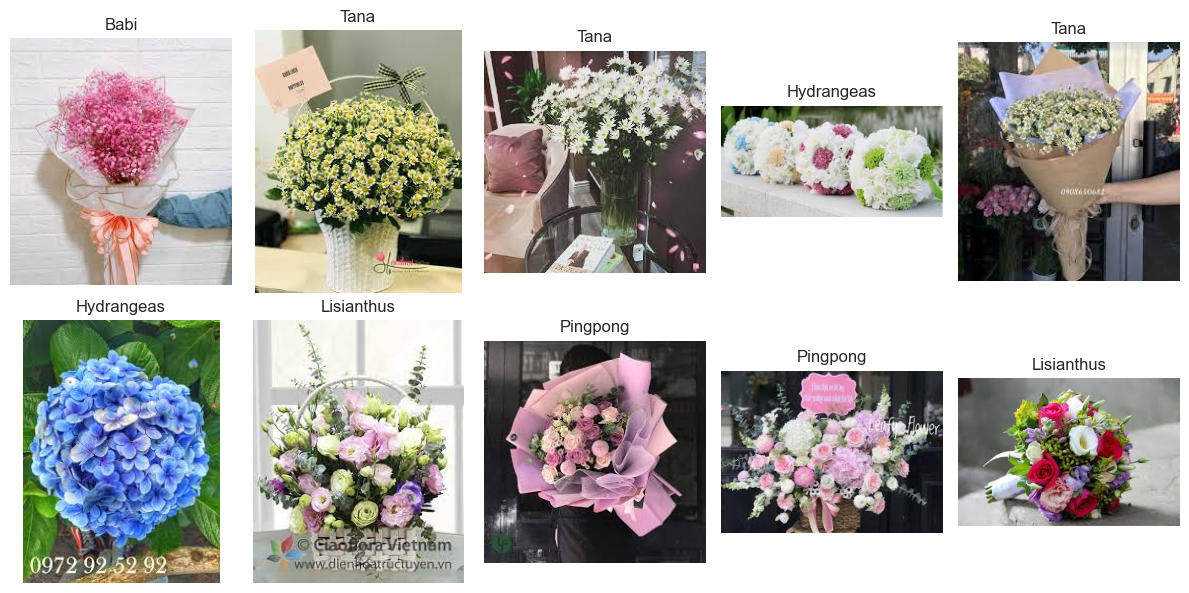

In [30]:
# Create a 2x5 grid for displaying the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(2):
    for j in range(5):
        # Select a random label
        random_label = random.choice(flower_labels)

        # Get the path to the subfolder containing images for the selected label
        subfolder_path = os.path.join(flower_dataset, random_label)

        # Get a list of all image files in the subfolder
        image_files = os.listdir(subfolder_path)

        # Select a random image file
        random_image_file = random.choice(image_files)

        # Get the full path to the randomly selected image
        image_path = os.path.join(subfolder_path, random_image_file)

        # Load the image
        image = mpimg.imread(image_path)

        # Display the image in the corresponding subplot
        axs[i, j].imshow(image)
        axs[i, j].axis('off')
        axs[i, j].set_title(random_label)

plt.tight_layout()
plt.show()

# 2. Explanatory Data Analysis

## 2.1. Color channel distribution

In [9]:
def plot_color_distribution(main_folder):
    # Get a list of all sub-folders in the main folder
    sub_folders = [f.path for f in os.scandir(main_folder) if f.is_dir()]

    # Create a figure with 8 sub-plots
    fig, axs = plt.subplots(2, 4, figsize=(16,8))
    axs = axs.ravel()

    # Loop through each sub-folder and plot the color channel data for each image
    for i in range(len(sub_folders)):
        # Get the name of the sub-folder
        sub_folder_name = os.path.basename(sub_folders[i])

        # Get a list of all image file names in the sub-folder
        file_names = os.listdir(sub_folders[i])
        file_names = [f for f in file_names if f.endswith(".jpg") or f.endswith(".png")]

        # Initialize an array to store the color channel data
        channel_data = np.zeros((256, 3))

        # Loop through each image and accumulate the color channel data
        for j in range(len(file_names)):
            # Load the image file
            img_path = os.path.join(sub_folders[i], file_names[j])
            img = plt.imread(img_path)

            # Accumulate the color channel data
            for k in range(3):
                channel_data[:, k] += np.histogram(img[:, :, k], bins=256, range=(0, 256))[0]

        # Normalize the color channel data to percentages
        channel_data /= np.sum(channel_data, axis=0)
        channel_data *= 100

        # Define the colors and labels for the line plots
        colors = ['red', 'green', 'blue']
        labels = ['Red', 'Green', 'Blue']

        # Plot the percentage of each color channel for the category
        for k in range(3):
            axs[i].plot(range(256), channel_data[:, k], label=labels[k], color=colors[k], linewidth=1)

        # Set the title and legend for the sub-plot
        axs[i].set_title(sub_folder_name)
        axs[i].legend()

    # Set the plot title and axis labels
    fig.suptitle("Color channel distribution (percentage) of flower images", fontsize=20)
    for ax in axs.flat:
        ax.set_xlabel("Pixel value")
        ax.set_ylabel("Percentage")

    # Show the plot
    plt.tight_layout()
    plt.show()

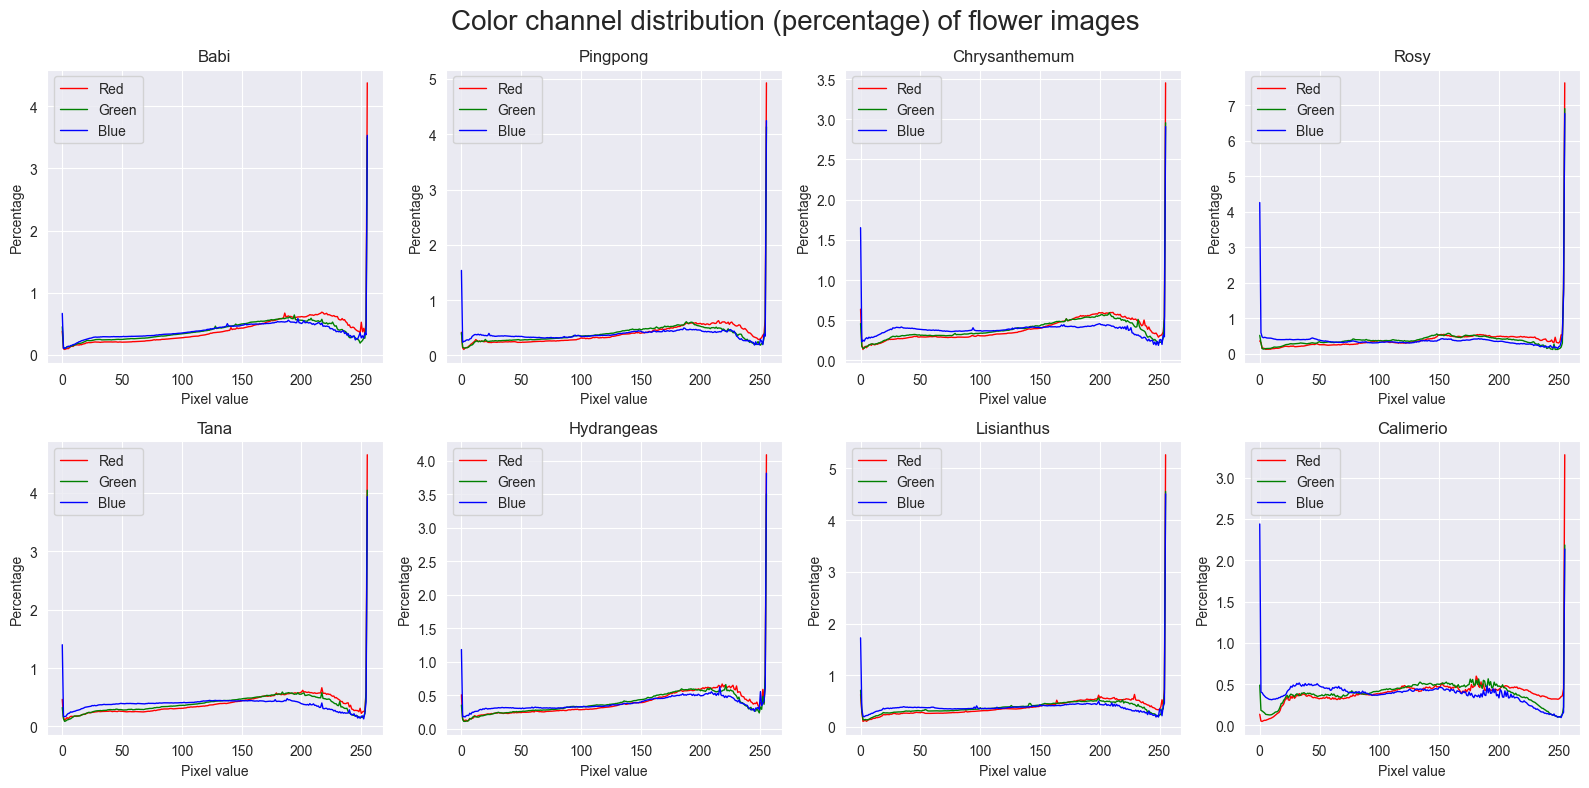

In [10]:
plot_color_distribution(flower_dataset)

## 2.2. Image size distribution

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_size_distribution(img_dir):
    categories = os.listdir(img_dir)
    fig, axs = plt.subplots(2, 4, figsize=(20,10))
    fig.suptitle('Image Size Distribution by Category')
    for i, category in enumerate(categories):
        size_list = []
        for filename in os.listdir(os.path.join(img_dir, category)):
            img_path = os.path.join(img_dir, category, filename)
            img = cv2.imread(img_path)
            size = os.path.getsize(img_path)
            size_list.append(size)

        ax = axs[i//4, i%4]
        ax.hist(size_list, bins=50)
        ax.set_title(category)
        ax.set_xlabel('Image Size (Bytes)')
        ax.set_ylabel('Frequency')
    plt.show()


- `Babi`: The image size distribution is horizontally symmetrical, ranging from 4,000 to 18,000 bytes. The preponderance of images are roughly 10,000 bytes in size.

- `Pingpong`: The image size distribution in Pingpong is right-skewed, with the majority of images lying under 20000 bytes.

- `Chrysanthemum`: The horizontally symmetrical image size distribution ranges from 5000 to 17500 bytes. Most images are between 10000 and 12500 bytes in size.

- `Rosy`: The distribution of image size is unbalanced, with the plurality of images ranging between 10000 and 30000 bytes. There are, however, images with quantities ranging from 100,000 to 200,000 bytes.

- `Tana`: The image size distribution is biased to the right, with the majority of images lying under 20000 bytes.

- `Hydrangeas`: The horizontally symmetrical image size distribution ranges from 5000 to 20,000 bytes. Most images are between 10000 and 12500 bytes in size.

- `Lisianthus`: The horizontally symmetrical image size distribution ranges from 4000 to 16000 bytes. The preponderance of image file sizes range between 10,000 and 12,000 bytes.

- `Calimerio`: The image size distribution is extremely unbalanced, with the preponderance of images being 10,000 bytes in size. There are, however, images with larger file sizes of up to 800,000 bytes.


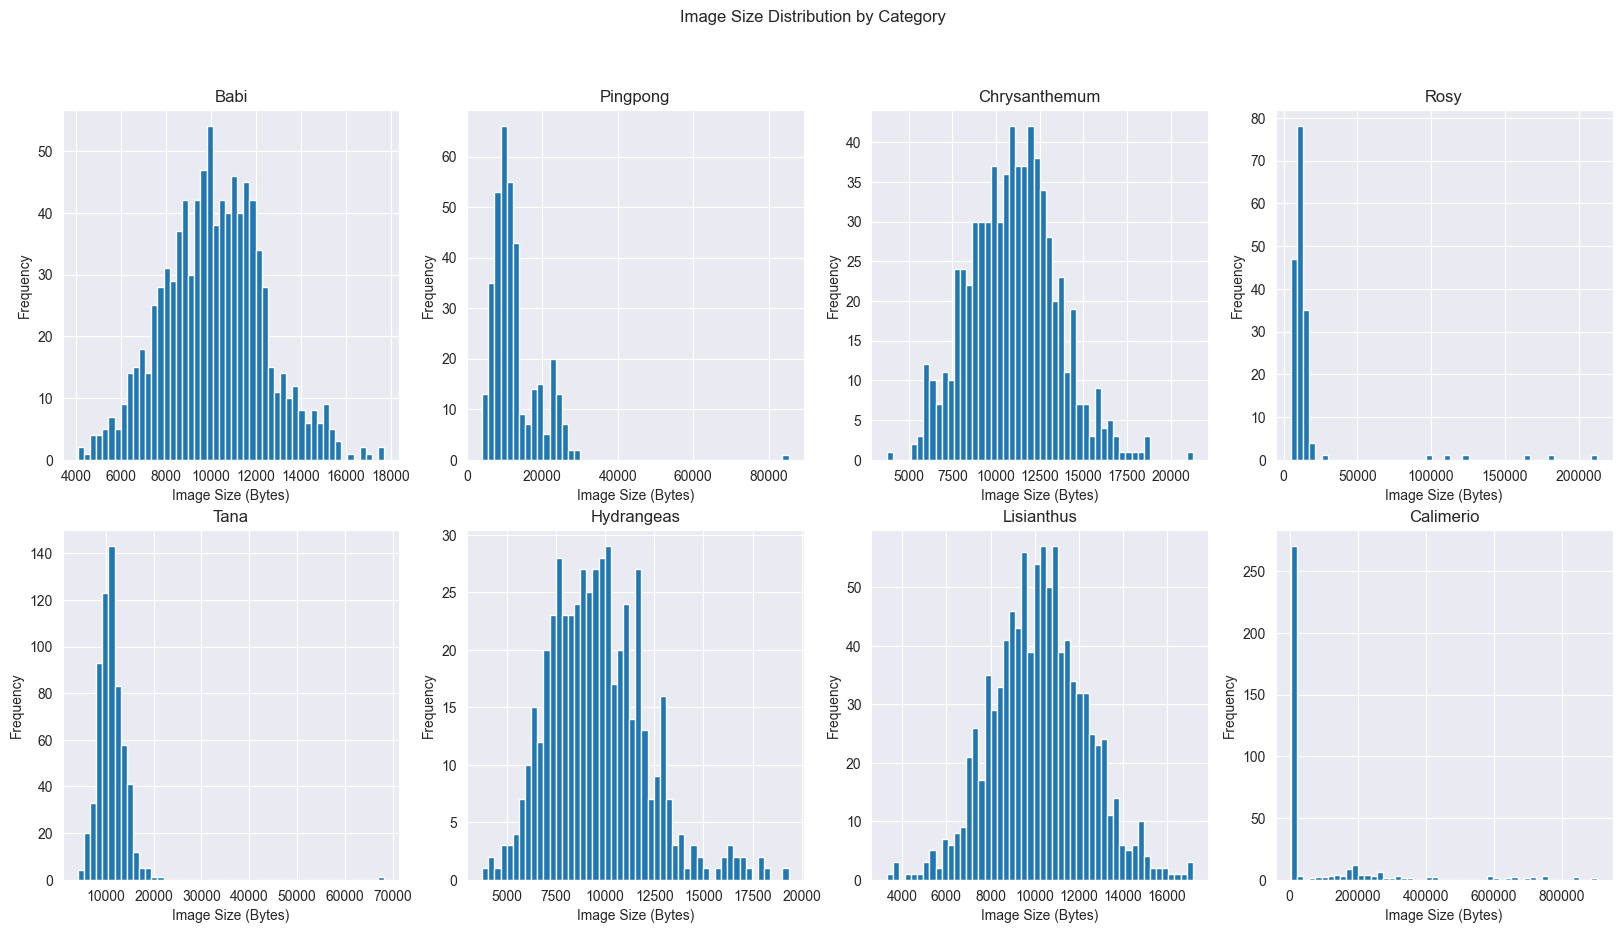

In [12]:
plot_size_distribution(flower_dataset)

## 2.3. Flower category distribution

In [13]:
def plot_category_distribution(main_dir):
    categories = os.listdir(main_dir)
    category_counts = [len(os.listdir(os.path.join(main_dir, cat))) for cat in categories]
    plt.bar(categories, category_counts)
    plt.xticks(rotation=45)
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Flower Category Distribution')
    plt.show()

- `Babi`: 931 images (20.15%)
- `Pingpong`: 360 images (7.79%)
- `Chrysanthemum`: 696 images (15.07%)
- `Rosy`: 171 images (3.70%)
- `Tana`: 623 images (13.49%)
- `Hydrangeas`: 518 images (11.21%)
- `Lisianthus`: 969 images (20.96%)
- `Calimerio`: 353 images (7.64%)

This dataset exhibits an imbalance in the distribution of flower categories. Some categories have a higher number of images compared to others, Babi, Chrysanthemum and Lisianthus is 56.18% which is more than a half of the dataset. This imbalance can potentially affect the performance of the classification model, as the model may become biased towards the majority categories and struggle to accurately classify the minority categories.

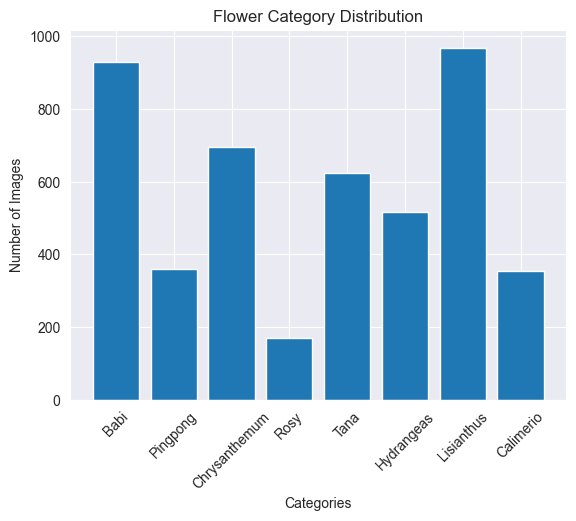

In [14]:
plot_category_distribution(flower_dataset)

# Evaluation Framework

In the evaluation framework for a machine learning (ML) model for flower classification, accuracy is selected as the primary metric. Accuracy is a frequently employed and intuitive metric that measures the proportion of correctly classified flower images relative to the total. In floral classification duties, it is essential to correctly identify the flower species or category, making accuracy a relevant and valuable metric. Accuracy provides a balanced evaluation of a model's performance, incorporating both sensitivity and specificity, by considering both true positives and true negatives. Its straightforward interpretation makes it simple for consumers and stakeholders without technical knowledge to comprehend. When the objective is to correctly identify flower species with a high level of overall precision, precision corresponds to the intended outcome. Notably, additional metrics such as precision, recall, and F1-score should be considered in imbalanced datasets to account for the differences in category sizes. 

Overall, accuracy serves as a robust evaluation metric that emphasizes the correct classification of flowers and provides a comprehensive evaluation of the performance of the model.